In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('Gasoline.csv')
#df = pd.read_csv('BBM 0.csv')
df

Tanggal    qty       Jumlah
0     2016-01-01   8694   63467076.0
1     2016-01-02  10044   73320032.0
2     2016-01-03  13928  101671188.0
3     2016-01-04  12518   91382972.0
4     2016-01-05  11112   77424375.0
...          ...    ...          ...
1993  2021-10-25  12239   93628350.0
1994  2021-10-26  11319   86590350.0
1995  2021-10-27  12502   95640300.0
1996  2021-10-28  12456   95288400.0
1997  2021-10-29  11228   85894200.0

[1998 rows x 3 columns]

Text(0.5, 0, 'Date')

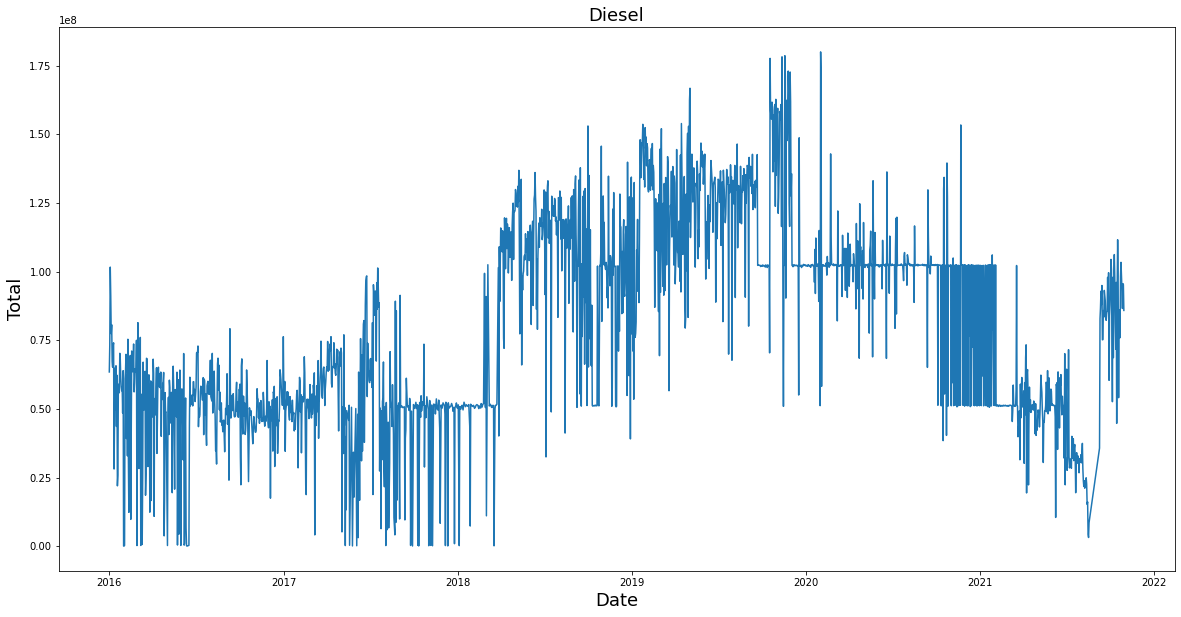

In [2]:
# Mengatur Tanggal dan Data
df['Tanggal'] = pd.to_datetime(df.Tanggal, format='%Y-%m-%d')
df.index = df['Tanggal']

#Plot
plt.figure(figsize=(20,10))
plt.plot(df['Jumlah'],label='History Harga Penutup')
plt.title('Diesel', fontsize=18)
plt.ylabel('Total',fontsize=18)
plt.xlabel('Date',fontsize=18)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

#Membuat Matrix 2 Dimensi
data = df.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Tanggal','Jumlah'])
for i in range(0,len(df)):
    new_data['Tanggal'][i] = data['Tanggal'][i]
    new_data['Jumlah'][i] = data['Jumlah'][i]
    
#Membuat Tanggal menjadi Index di variable new_data
new_data.index = new_data['Tanggal']
new_data.drop('Tanggal',axis=1,inplace=True)

#Membuat Data Latih dan Test
#Menampung Data Untuk dijadikan Data olah
dataset = new_data.values 
#Membuat data latih
train = dataset[0:1600,:]
#Membuat Data Uji
valid = dataset[1600:,:]
 
    

2023-01-30 19:56:26.830974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 19:56:27.309068: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 19:56:27.309108: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-30 19:56:28.819576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
#Normalisasi Data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

x_train,y_train = [],[]
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

print(x_train)


[[[0.35237041]
  [0.40708254]
  [0.56451266]
  ...
  [0.41636229]
  [0.00106129]
  [0.36089651]]

 [[0.40708254]
  [0.56451266]
  [0.5073836 ]
  ...
  [0.00106129]
  [0.36089651]
  [0.45212047]]

 [[0.56451266]
  [0.5073836 ]
  [0.4298734 ]
  ...
  [0.36089651]
  [0.45212047]
  [0.39878692]]

 ...

 [[0.56838169]
  [0.44062611]
  [0.59950577]
  ...
  [0.56881148]
  [0.56838169]
  [0.57035157]]

 [[0.44062611]
  [0.59950577]
  [0.6634731 ]
  ...
  [0.56838169]
  [0.57035157]
  [0.56873985]]

 [[0.59950577]
  [0.6634731 ]
  [0.46963705]
  ...
  [0.57035157]
  [0.56873985]
  [0.56848914]]]


In [5]:
# Membuat Model dan fit LSTM Network

model = Sequential()
model.add(LSTM(units=68,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=68))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=100,batch_size=2,verbose=2)

2023-01-30 19:56:36.470363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-30 19:56:36.470669: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-30 19:56:36.470713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Responn-PC): /proc/driver/nvidia/version does not exist
2023-01-30 19:56:36.471688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
770/770 - 32s - loss: 0.0142 - 32s/epoch - 41ms/step
Epoch 2/100
770/770 - 30s - loss: 0.0120 - 30s/epoch - 39ms/step
Epoch 3/100
770/770 - 30s - loss: 0.0118 - 30s/epoch - 39ms/step
Epoch 4/100
770/770 - 30s - loss: 0.0114 - 30s/epoch - 40ms/step
Epoch 5/100
770/770 - 31s - loss: 0.0116 - 31s/epoch - 40ms/step
Epoch 6/100
770/770 - 31s - loss: 0.0115 - 31s/epoch - 40ms/step
Epoch 7/100
770/770 - 31s - loss: 0.0118 - 31s/epoch - 40ms/step
Epoch 8/100
770/770 - 31s - loss: 0.0116 - 31s/epoch - 40ms/step
Epoch 9/100
770/770 - 31s - loss: 0.0114 - 31s/epoch - 41ms/step
Epoch 10/100
770/770 - 31s - loss: 0.0111 - 31s/epoch - 40ms/step
Epoch 11/100
770/770 - 31s - loss: 0.0115 - 31s/epoch - 41ms/step
Epoch 12/100
770/770 - 31s - loss: 0.0110 - 31s/epoch - 40ms/step
Epoch 13/100
770/770 - 31s - loss: 0.0112 - 31s/epoch - 41ms/step
Epoch 14/100
770/770 - 31s - loss: 0.0110 - 31s/epoch - 40ms/step
Epoch 15/100
770/770 - 31s - loss: 0.0111 - 31s/epoch - 41ms/step
Epoch 16/100
770/77

In [6]:
#Prediksi 246 Values dengan 60 Data Train
inputs = new_data[len(new_data)-len(valid)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

13/13 [==============================] - 1s 22ms/step


In [7]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

20341005.139887877

In [8]:
rmse = np.sqrt(np.mean((valid - closing_price)**2))
rmse

20341005.139887877

In [9]:
mape = np.mean(np.abs((valid - closing_price) / valid)) * 100
mape

34.56293251795673

/tmp/ipykernel_5380/836569619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


(34.56293251795673, 20341005.139887877)

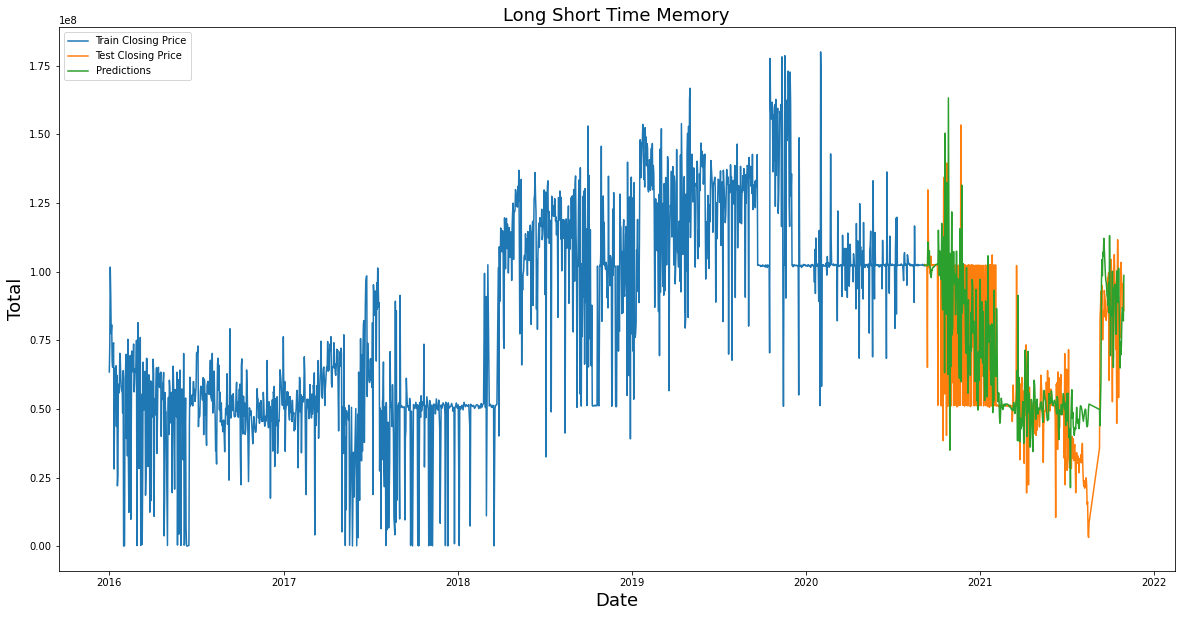

In [10]:
#Chart Grafik
train = new_data[:1600]
valid = new_data[1600:]

valid['Predictions'] = closing_price
plt.title('Long Short Time Memory',fontsize=18)
# plt.plot(train['Jumlah'])
# plt.plot(valid[['Jumlah','Predictions']])

plt.plot(train['Jumlah'], label = 'Train Closing Price')
plt.plot(valid['Jumlah'], label = 'Test Closing Price')
plt.plot(valid['Predictions'], label = 'Predictions')
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)
# plt.plot(df['Jumlah'],alpha = 0.5, label='Jumlah')
# plt.plot(df['SMA20'],alpha = 0.5, label='SMA20')
# plt.plot(df['SMA50'],alpha = 0.5, label='SMA50')
mape,rmse